# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [42]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

zillow_data = pd.read_csv('zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [38]:
zillow_data.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


### Understand the data set
1. What type of city, metro, and state there is?
2. Should you consider just looking into one state or take it all in
3. Figure out what size rank means 
4. Region name vs region id

In [21]:
# When looking into this dataset surprisingly you can see Hawaii
zillow_data.State.value_counts().to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, CA to VT
Data columns (total 1 columns):
State    51 non-null int64
dtypes: int64(1)
memory usage: 816.0+ bytes


In [30]:
# Since my home town is in NJ I will try and focus on Nj 
NJ_zillow_data = zillow_data.loc[(zillow_data.State == 'NJ') & (zillow_data.CountyName == 'Hudson')]
NJ_zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700
319,60594,7087,Union City,NJ,New York,Hudson,320,127300.0,127000.0,126700.0,...,367000,377500,386000,394700,403700,410500,415500,424000,437400,448900


In [31]:
NJ_zillow_data.City.value_counts()

Jersey City      4
North Bergen     1
Bayonne          1
Hoboken          1
Union City       1
Weehawken        1
Harrison         1
Secaucus         1
Kearny           1
West New York    1
Name: City, dtype: int64

In [33]:
West_New_York_zd = NJ_zillow_data.loc[(NJ_zillow_data.City == 'West New York')]
West_New_York_zd

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700


In [ ]:
zillow_data.iloc[:, 7::]

# Step 2: Data Preprocessing

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [24]:
get_datetimes(zillow_data.iloc[:, 7::])

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [28]:
df_time = get_datetimes(zillow_data.iloc[:, 7::])

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [34]:
def melt_data(df):
    #id_vars keeps all columns you want to remain intake, var_name 
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [35]:
wny_zd_long = melt_data(West_New_York_zd)

In [38]:
# Check if your time column is the right datatype
wny_zd_long

,RegionName,City,State,Metro,CountyName,SizeRank,RegionID,time,value
0,7093,West New York,NJ,New York,Hudson,215,60599,1996-04-01,131700.0
1,7093,West New York,NJ,New York,Hudson,215,60599,1996-05-01,131900.0
2,7093,West New York,NJ,New York,Hudson,215,60599,1996-06-01,132100.0
3,7093,West New York,NJ,New York,Hudson,215,60599,1996-07-01,132300.0
4,7093,West New York,NJ,New York,Hudson,215,60599,1996-08-01,132500.0
...,...,...,...,...,...,...,...,...,...
260,7093,West New York,NJ,New York,Hudson,215,60599,2017-12-01,395100.0
261,7093,West New York,NJ,New York,Hudson,215,60599,2018-01-01,395500.0
262,7093,West New York,NJ,New York,Hudson,215,60599,2018-02-01,399400.0
263,7093,West New York,NJ,New York,Hudson,215,60599,2018-03-01,407000.0


In [40]:
# Make time as the index
wny_zd_long.set_index('time', inplace=True)

In [41]:
wny_zd_long.head()

,RegionName,City,State,Metro,CountyName,SizeRank,RegionID,value
time,,,,,,,,
1996-04-01,7093,West New York,NJ,New York,Hudson,215,60599,131700.0
1996-05-01,7093,West New York,NJ,New York,Hudson,215,60599,131900.0
1996-06-01,7093,West New York,NJ,New York,Hudson,215,60599,132100.0
1996-07-01,7093,West New York,NJ,New York,Hudson,215,60599,132300.0
1996-08-01,7093,West New York,NJ,New York,Hudson,215,60599,132500.0


In [48]:
wny_zd = wny_zd_long.drop(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], axis=1)

In [91]:
wny_zd = wny_zd[:-4]

In [93]:
wny_zd = wny_zd[9:]

In [94]:
wny_zd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1997-01-01 to 2017-12-01
Data columns (total 1 columns):
value    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


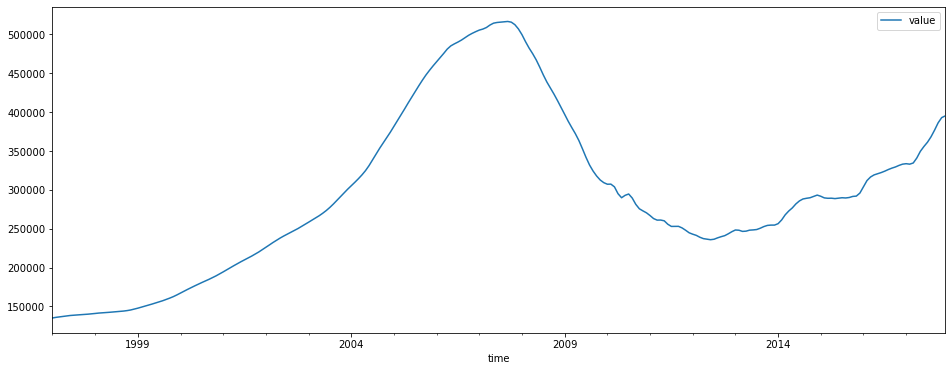

In [95]:
# Draw a line plot using wny_zd and .plot method()
wny_zd.plot(figsize = (16,6))

In [96]:
# grouping and visualizing time series data
wny_zd.groupby(pd.Grouper(freq ='A'))

In [62]:
year_groups.head()

,value
time,
1996-04-01,131700.0
1996-05-01,131900.0
1996-06-01,132100.0
1996-07-01,132300.0
1996-08-01,132500.0
...,...
2017-05-01,349500.0
2018-01-01,395500.0
2018-02-01,399400.0


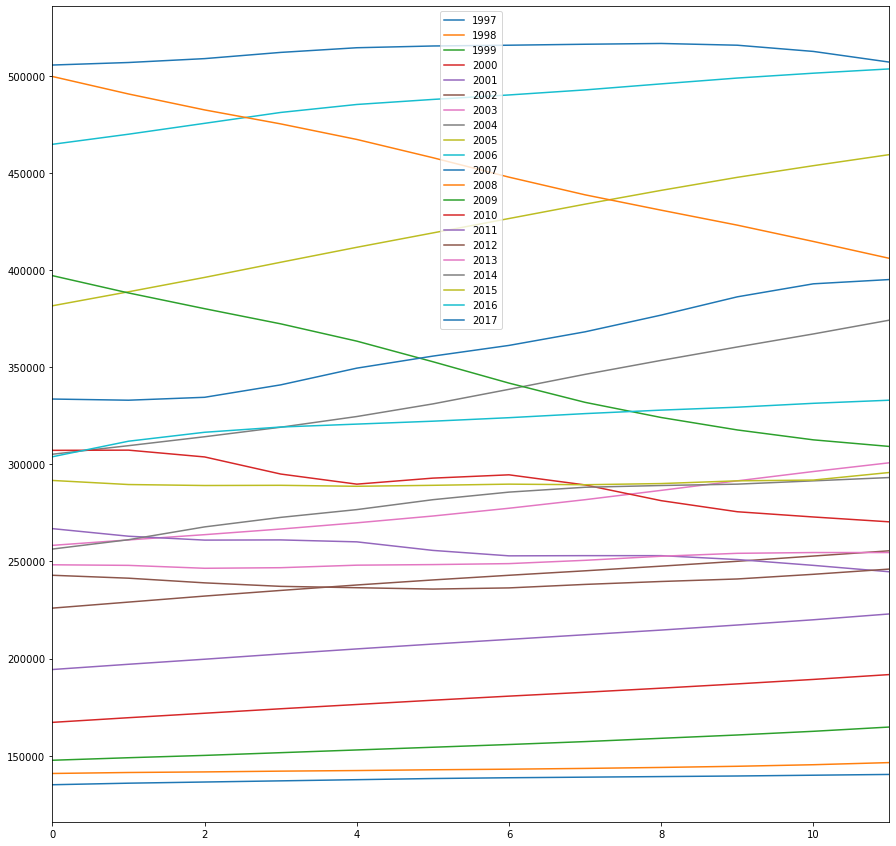

In [101]:
# Create a new df and store yearly values in columns
wny_annual = pd.DataFrame()

for yr, group in wny_zd.groupby(pd.Grouper(freq ='A')):
    wny_annual[yr.year] = group.values.ravel()
    
#Plot the yearly groups as subplots
wny_annual.plot(figsize = (15,15), subplots=False, legend=True);

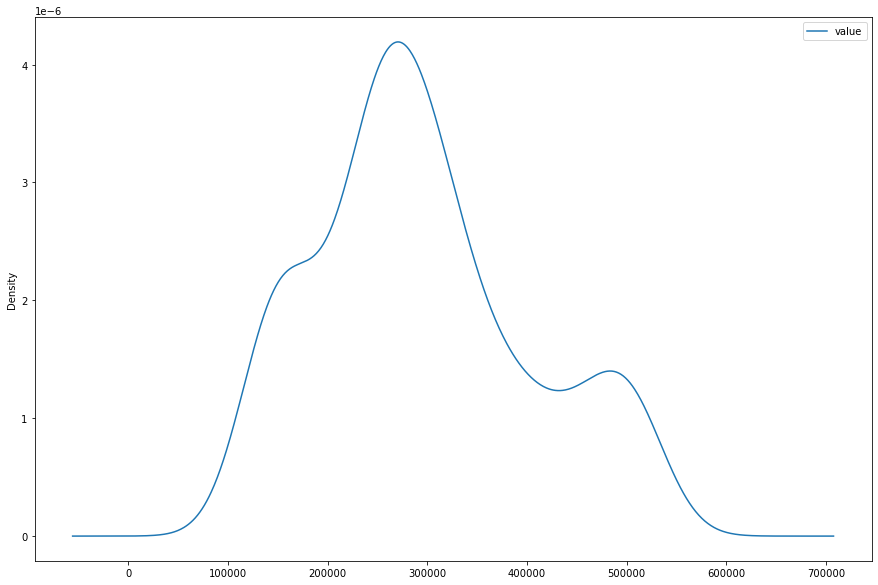

In [102]:
# Plot a density plot for wny_zd

wny_zd.plot(kind='kde', figsize = (15,10))

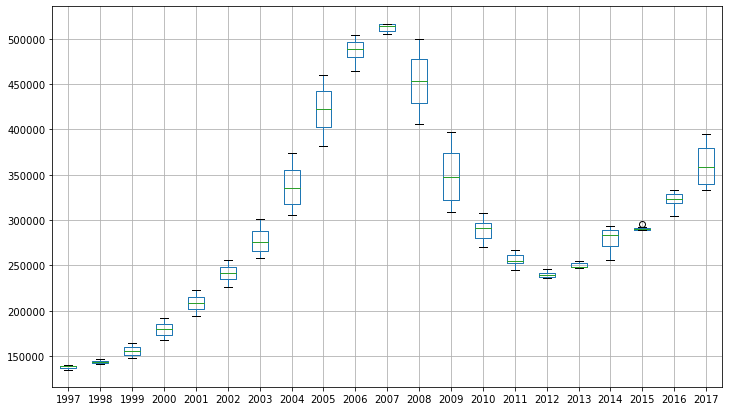

In [103]:
wny_annual.boxplot(figsize = (12,7))

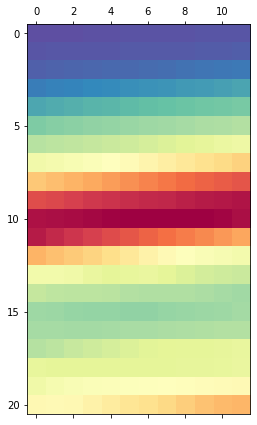

In [105]:
year_matrix = wny_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)

# Test for tends 
1. Visualizing rolling mean and std
2. The Dickey-Fuller Test

In [114]:
def stationarity_check(df):
    # Create rolling mean and std to test for trends
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # The Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df)
    # Plot rolling statistics
    fig = plt.figure(figsize=(12,7))
    plt.plot(wny_zd, color = 'blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Print Dickey_fuller test results
    print('Results of the Dickey-Fuller Test: \n')

    #Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

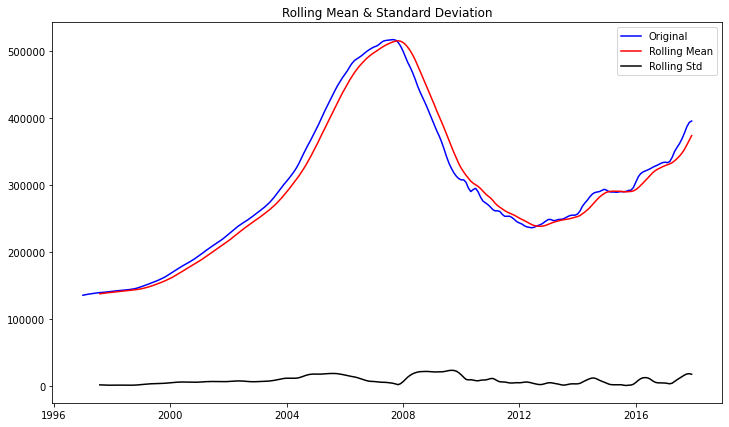

Results of the Dickey-Fuller Test: 

Test Statistic            -3.183839
p-value                    0.020939
#lags Used                13.000000
Number of Observation    238.000000
Critical Value (1%)       -3.458128
Critical Value (5%)       -2.873762
Critical Value (10%)      -2.573283
dtype: float64


In [115]:
stationarity_check(wny_zd)

The Dickey-Fuller test statisitic is not less than the Critical Value (1%). We can not reject the null hypothesis that the series is not stationary. The p-value is not below the strict 0.01 mark


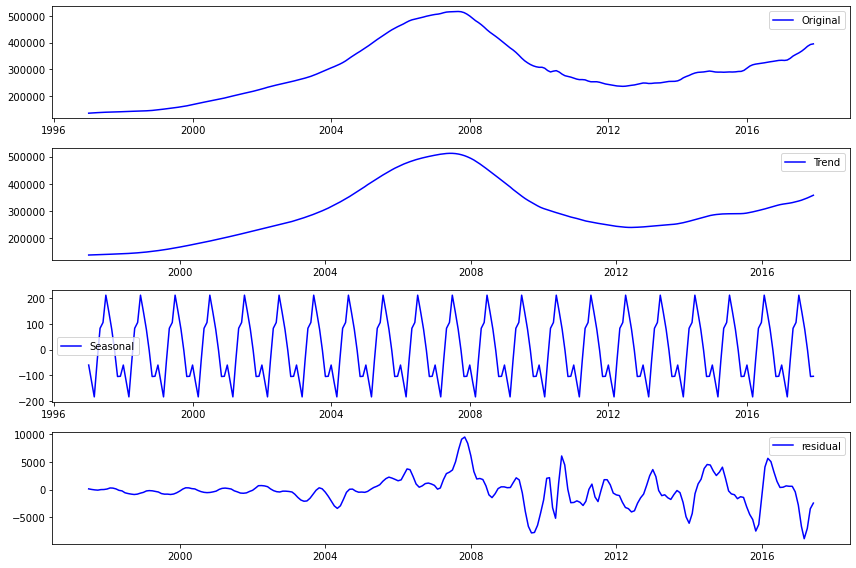

In [119]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(wny_zd)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

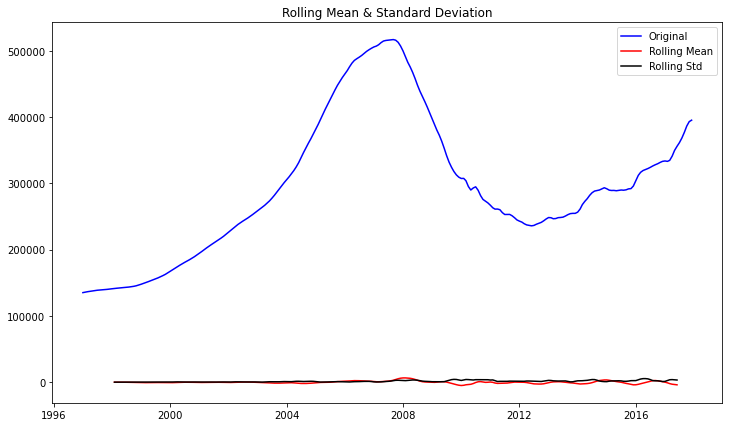

Results of the Dickey-Fuller Test: 

Test Statistic            -2.914719
p-value                    0.043663
#lags Used                11.000000
Number of Observation    228.000000
Critical Value (1%)       -3.459361
Critical Value (5%)       -2.874302
Critical Value (10%)      -2.573571
dtype: float64


In [120]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

### Weighted rolling mean and Differencing then seasonal_decompose to see which is a better results

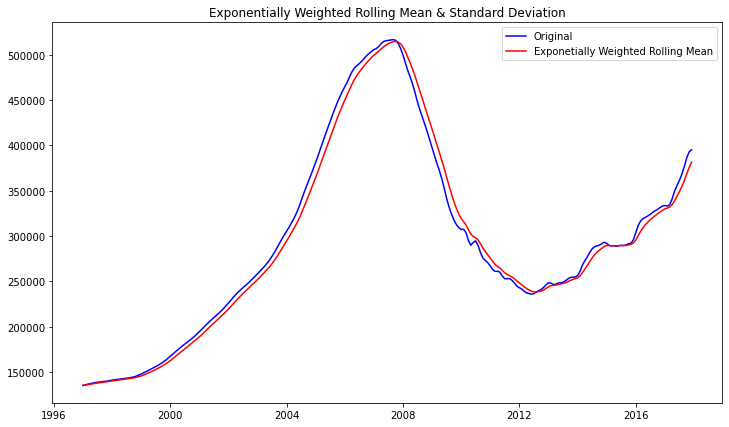

In [121]:
# Use Pandas ewm() to calculate Expontential Weighted Moving Average
exp_roll_mean = wny_zd.ewm(halflife=2).mean()

#Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(wny_zd, color='b', label='Original')
mean =plt.plot(exp_roll_mean, color='r', label='Exponetially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [122]:
# Subtact the moving avg from original data
data_minus_exp_roll_mean = wny_zd - exp_roll_mean
data_minus_exp_roll_mean.head()

,value
time,
1997-01-01,0.000000
1997-02-01,331.370850
1997-03-01,509.383632
1997-04-01,676.142375
1997-05-01,822.105851


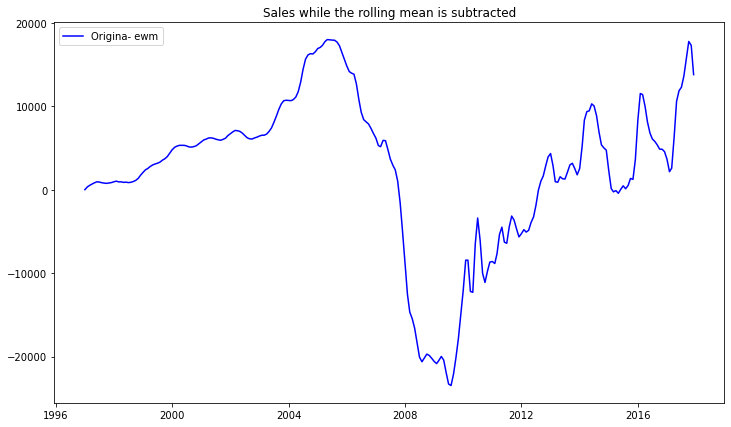

In [124]:
fig = plt.figure(figsize=(12,7))
plt.plot(data_minus_exp_roll_mean, color='b', label='Origina- ewm')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

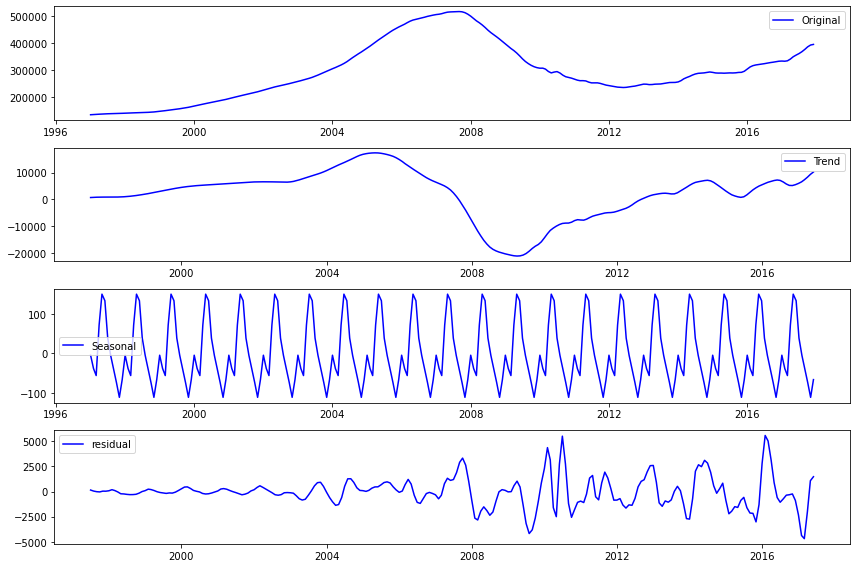

In [163]:
decomposition = seasonal_decompose(data_minus_exp_roll_mean)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

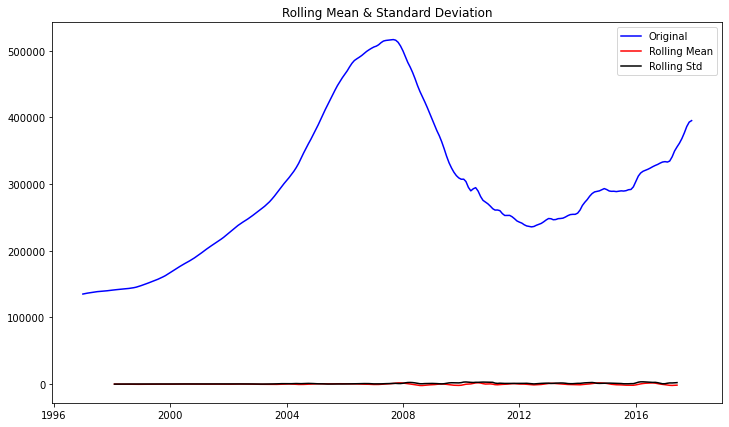

Results of the Dickey-Fuller Test: 

Test Statistic          -8.646110e+00
p-value                  5.265443e-14
#lags Used               8.000000e+00
Number of Observation    2.310000e+02
Critical Value (1%)     -3.458980e+00
Critical Value (5%)     -2.874135e+00
Critical Value (10%)    -2.573482e+00
dtype: float64


In [164]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

In [169]:
data_diff = wny_zd.diff(periods=1)
data_diff.isna().sum()

value    1
dtype: int64

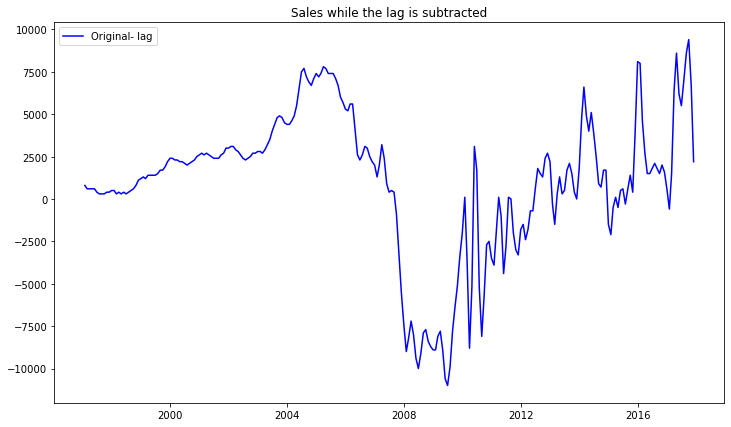

In [170]:
fig = plt.figure(figsize=(12,7))
data_diff.dropna(inplace=True)
plt.plot(data_diff, color='b', label='Original- lag')
plt.legend(loc='best')
plt.title('Sales while the lag is subtracted')
plt.show(block=False)

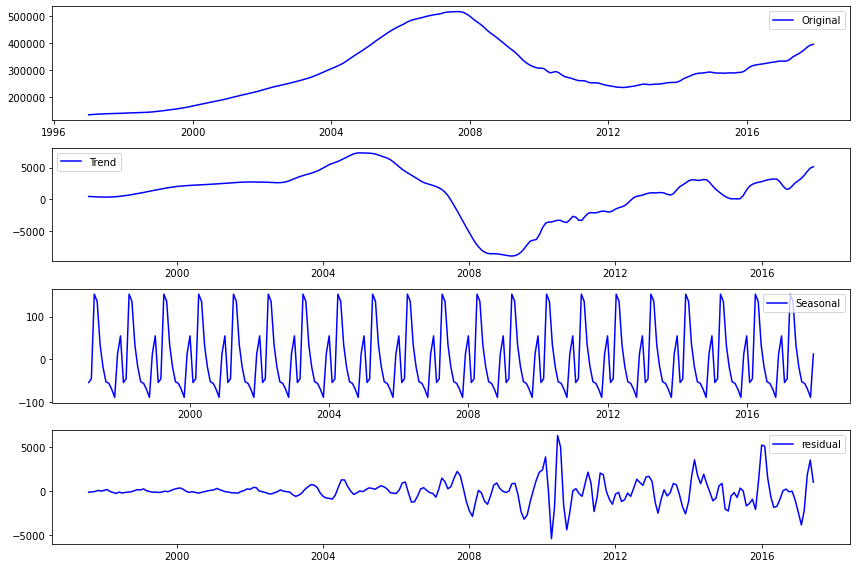

In [171]:
decomposition = seasonal_decompose(data_diff)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

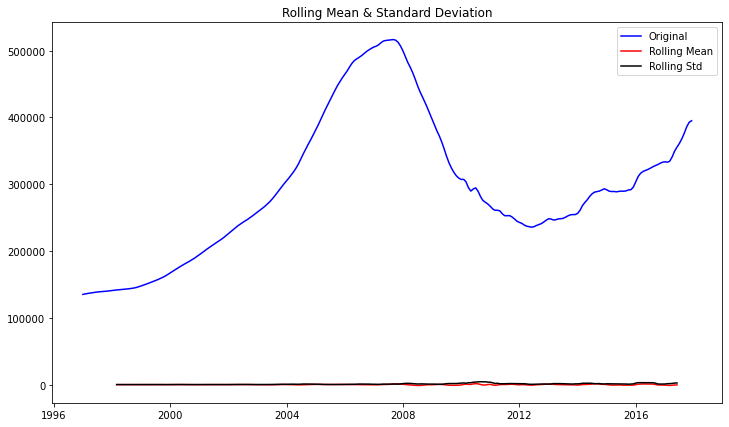

Results of the Dickey-Fuller Test: 

Test Statistic          -6.893047e+00
p-value                  1.340366e-09
#lags Used               1.300000e+01
Number of Observation    2.250000e+02
Critical Value (1%)     -3.459752e+00
Critical Value (5%)     -2.874473e+00
Critical Value (10%)    -2.573663e+00
dtype: float64


In [172]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

# Questions to ask
1. Why are we looking at the residuals after we perform decompose
2. How to understand what period to use when using differencing
3. Do you usually apply ewm when there is a trend up or downward with greater volume as a function of time 
4. When should you move foward with the made stationary data

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results